#**Gaussian Processes**
The gaussian process provides a opportunity to transform typical linear functions into their non-linear form and used for many machine learning application. The popularity of the Support Vector Machine has brought much attention to this technique and is used for many machine learning application and modelling. 



### Workspace utilities

In [1]:
# import required libraries
import numpy as np
import scipy.stats
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

### **Sampling from a Gaussian process prior**

Here, the code needed to draw and plot samples of $ f(\mathbf .) $ from a Gaussian proces prior with a squared exponential (or equivalently, RBF) kernel, more specifically $\mathbf f: \mathbb R \rightarrow \mathbb R $ such that:

$ f(\mathbf .) \approx GP(m(.), k(., .))$ with $m(x) = 0$ and $k(x, x^{\prime}) = \sigma^2 exp(\frac{1}{2l^2} \|\ x -x^{\prime} \|)$. 


We choose a vector of m test input points $ x^{\ast} = \begin {bmatrix} x_1^{\ast}, & \cdots &, x_n^{\ast} \end {bmatrix}^ T$. We will choose $ x^{\ast} $ to contain sufficiently many points, such that it will appear as a continuous function on the screen. We then evaluate the $m \times m$ covariance matrix
$ K (x^{\ast}, x^{\ast}) =
 \begin{bmatrix}
   K (x_1^{\ast}, x_1^{\ast}) & \cdots &  K (x_1^{\ast}, x_m^{\ast})\\
  \vdots  & \vdots  &\vdots  \\
  K (x_m^{\ast}, x_1^{\ast}) & \cdots & K (x_m^{\ast}, x_m^{\ast})
 \end{bmatrix}
$

and thereafter generate samples from the multivariate normal distribution: 
$ f(x^{\ast}) \approx \mathcal{N} (m(x^{\ast}), k(x^{\ast}, x^{\ast}))$

In [2]:
# construct a vector x* with 101 equally spaced betwee -5 and 5
m = 101
xs = np.linspace(-5, 5, num = m)

# construct a mean vector with 101 elements all equal to zero
x_mean = np.zeros(m)


# construct the 101 covariance matrix, k
cov = m*np.eye(m)

def kernel(xs, cov = m*np.eye(m), l = 2):
  """
  Function to extract compute the covariance matrix
  Default Input: Cov and l =2
  """
  xs = (np.abs(xs[:, np.newaxis]-xs[:, np.newaxis].T)**2)
  denom = 2*np.square(l)
  cov = np.square(cov)
  return cov*(np.exp(-xs/denom))
  #*(cov**2)
  

In [3]:
def plot_covariance(xs, cov_range, l =2):
  """
  https://engineeringfordatascience.com/posts/matplotlib_subplots/
  Function for dynamic plotting of the Covariance
  """

  fig, axs = plt.subplots(len(cov_range),
                          figsize = (8, 8))
  
  fig.suptitle("Covariance Plot")
  for c, ax in zip(cov_range, axs.ravel()):
    f = kernel(xs, c, l)
    ax.plot(xs, f)
    ax.set_xlabel("")
    ax.set_title(f"Covariance: {c}")

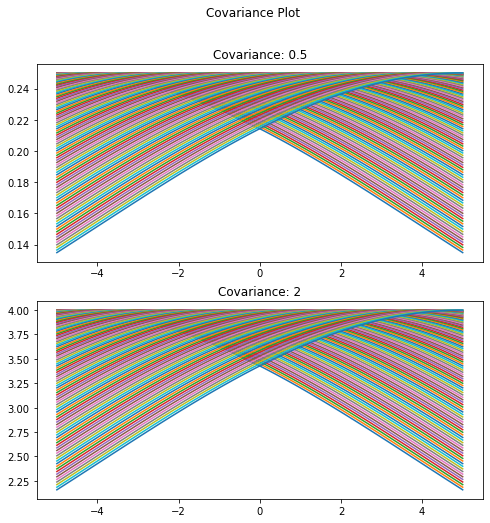

In [4]:
cov = [0.5, 2] 
plot_covariance(xs, cov, 9)

In [5]:
# Draw 25 Realizations of the function on the 101 grid points from a 
# multivariate normal distribution
sample_size = 25
f = kernel(xs, 1, 2) # covariance with l = 2 and var = 1
new_distribution = multivariate_normal(x_mean, cov=f, allow_singular=True)
fs = new_distribution.rvs(sample_size).T

Text(0.5, 1.0, 'Samples: 25, l = 2, Cov=1')

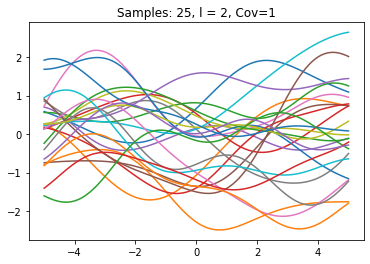

In [6]:
plt.plot(xs, fs)
plt.title('Samples: 25, l = 2, Cov=1')

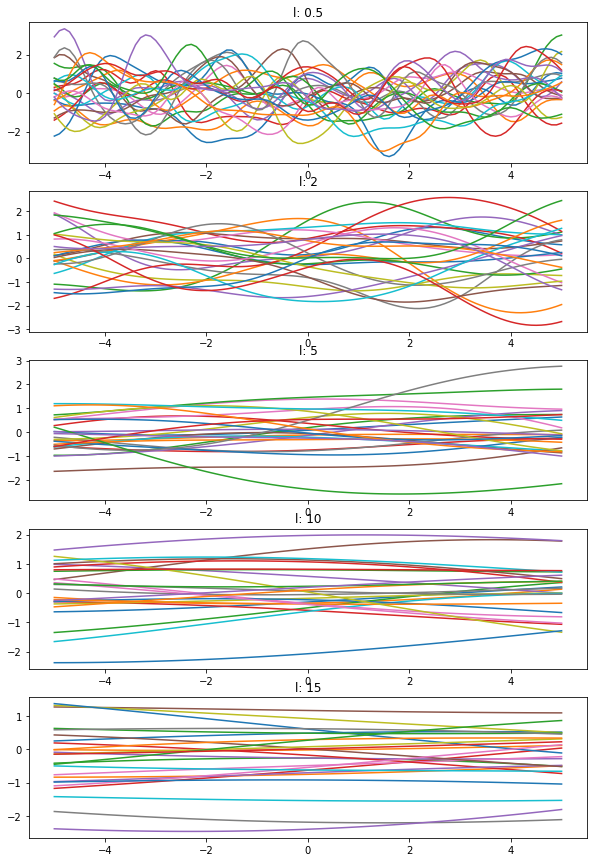

In [7]:
# function to comparatively plot samples
l_range = [0.5, 2, 5, 10, 15]
fig, axs = plt.subplots(len(l_range),
                        figsize = (10, 15))

for l, ax in zip(l_range, axs.ravel()):
  f = kernel(xs, 1, l)
  new_distribution = multivariate_normal(x_mean, cov=f, allow_singular=True)
  fs = new_distribution.rvs(sample_size).T
  ax.plot(xs, fs)
  ax.set_xlabel("")
  ax.set_title(f"l: {l}")

**How do these plots with different values of L differ?**

The hyperparameter l, in this plot, represents the length scale and as seen above the higher this parameter is, the smoother the gaussian realization is. This implicitly indicate that with higher value of l, we get an even higher covariance spread away from the mean.


## **II. Gaussian Processes Posterior**
In this section, we will perform a Gaussian process regression. This imply that based on the N (noiseless) observations $\mathcal{D} = \{ x^{(i)}, y = f(x^{(i)}) \}_{i=1}^N $ and the prior belief $f(.) \approx \mathcal GP(m(.), \kappa (.,.))$, we want to find the posterior $p(f|\mathcal D)$. We will also consider the same Gaussian process prior (same mean $m(x)$, covariance kernel $\kappa(x, x^\prime)$ and hyperparameters) as in the previous section. 

In [8]:
# construct two vectors
n = 5
x1 = np.array([-4, -3, -1, 0, 2])
x2 = np.array([-2, 0, 1, 2, -1])

# construct xs
m= 101
xs = np.linspace(-5, 5, m)

# construct the n by m matrix and the n by n matrix

def kernel_new(x, xs, cov, l):
  xs = (np.abs(x[:, np.newaxis]-xs[:, np.newaxis].T)**2)
  denom =  2*np.square(l)
  cov = np.square(cov)
  return cov*(np.exp(-xs/denom))

In [9]:
Kss = kernel_new(xs, xs, 1, 2) # m by m matrix
Ks = kernel_new(x1, xs, 1, 2) # n by m matrix
K = kernel_new(x1,x1, 1, 2) # n by n matrix

In [10]:
# use the training data and the matrices to compute the posterior mean and 
# the posterior covariance for xs by using the equations for conditional 
# multivariate normal distribution
posterior_mean = np.dot(np.dot(Ks.T, np.linalg.inv(K)), x2)
posterior_cov = Kss - np.dot(Ks.T, np.dot(np.linalg.inv(K), Ks))


In [11]:
posterior_cov.shape

(101, 101)

In [12]:
# Draw 25 samples from the multivariate distribution
# Plot these samples together with the posterior mean and the actual measurements
sample_size = 25
fs = multivariate_normal(mean=posterior_mean, cov=posterior_cov, allow_singular=True)
fs = fs.rvs(sample_size).T

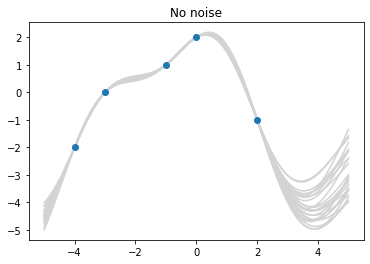

In [13]:
plt.plot(xs, fs, 'lightgray')
plt.scatter(x1, x2, zorder=3, cmap ='darkblue')
plt.title("No noise")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


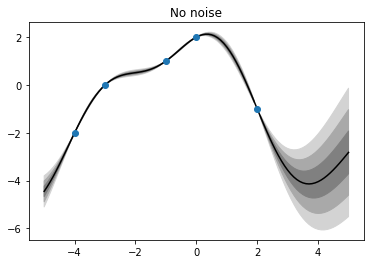

In [14]:
# Instead of plotting samples, plot a credibility region. 
plt.plot(xs, posterior_mean, 'black')
plt.fill_between(xs, posterior_mean + 3*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 3*np.sqrt(np.diag(posterior_cov)), 
                 color = 'lightgray')

plt.fill_between(xs, posterior_mean + 2*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 2*np.sqrt(np.diag(posterior_cov)), 
                 color = 'darkgray')

plt.fill_between(xs, posterior_mean + 1*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 1*np.sqrt(np.diag(posterior_cov)), 
                 color = 'gray')
plt.scatter(x1, x2, zorder=3)
plt.title("No noise")
plt.show()

How do the samples in this plot differ from the prior samples in the previous problem.

#### **Add Noise to the measurements based on the kernel function**

We consider the setting where the measurements are corrupted with noise $y_i = f(x_i) + \mathcal E_i, \mathcal E_i  \approx \mathcal N (0, \sigma^2)$. We set $ \sigma = 0.1 $

In [15]:
# add measurement noise, where yi = ...  
l = 2
K = kernel_new(x1, x1, 1, l) + 0.1*np.eye(n)
posterior_mean =  np.dot(np.dot(Ks.T, np.linalg.inv(K)), x2)
posterior_cov = Kss - np.dot(Ks.T, np.dot(np.linalg.inv(K), Ks))

In [16]:
fs = multivariate_normal(mean=posterior_mean, cov=posterior_cov, allow_singular=True)
fs = fs.rvs(sample_size).T

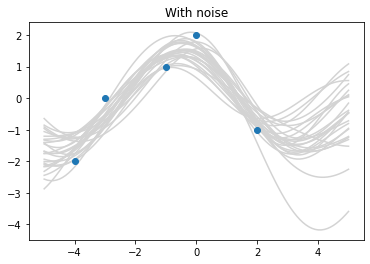

In [17]:
plt.plot(xs, fs, 'lightgray')
plt.scatter(x1, x2, zorder=3, cmap ='darkblue')
plt.title("With noise")
plt.show()

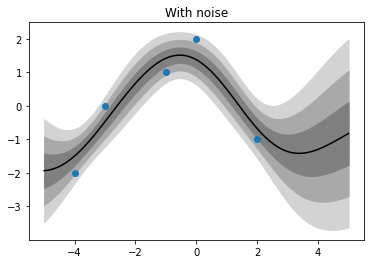

In [18]:
# Instead of plotting samples, plot a credibility region. 
plt.plot(xs, posterior_mean, 'black')
plt.fill_between(xs, posterior_mean + 3*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 3*np.sqrt(np.diag(posterior_cov)), 
                 color = 'lightgray')

plt.fill_between(xs, posterior_mean + 2*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 2*np.sqrt(np.diag(posterior_cov)), 
                 color = 'darkgray')

plt.fill_between(xs, posterior_mean + 1*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 1*np.sqrt(np.diag(posterior_cov)), 
                 color = 'gray')
plt.scatter(x1, x2, zorder=3)
plt.title("With noise")
plt.show()

#### **Adjust the length scale**
Here, we adjust the length scale hyperparameter to see how the modelling respond to this value. 

In [19]:
# See what happens with another length scale
# Test for x = 0.1 and 4
l = 0.1
Kss = kernel_new(xs, xs, 1, l)
Ks = kernel_new(x1, xs, 1, l)
K = kernel_new(x1, x1, 1, l) + 0.1*np.eye(n)
posterior_mean =  np.dot(np.dot(Ks.T, np.linalg.inv(K)), x2)
posterior_cov = Kss - np.dot(Ks.T, np.dot(np.linalg.inv(K), Ks))

In [20]:
fs = multivariate_normal(mean=posterior_mean, cov=posterior_cov, allow_singular=True)
fs = fs.rvs(sample_size).T

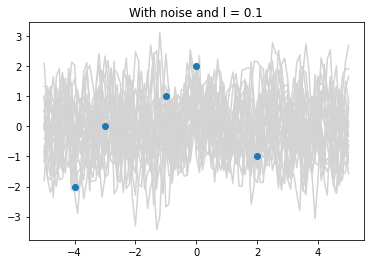

In [28]:
plt.plot(xs, fs, 'lightgray')
plt.scatter(x1, x2, zorder=3, cmap ='darkblue')
plt.title("With noise and l = 0.1")
plt.show()

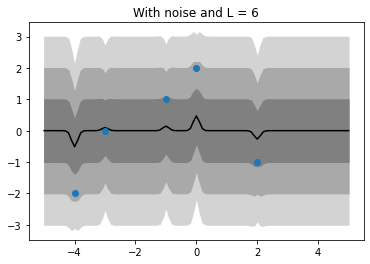

In [29]:
# Instead of plotting samples, plot a credibility region. 
plt.plot(xs, posterior_mean, 'black')
plt.fill_between(xs, posterior_mean + 3*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 3*np.sqrt(np.diag(posterior_cov)), 
                 color = 'lightgray')

plt.fill_between(xs, posterior_mean + 2*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 2*np.sqrt(np.diag(posterior_cov)), 
                 color = 'darkgray')

plt.fill_between(xs, posterior_mean + 1*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 1*np.sqrt(np.diag(posterior_cov)), 
                 color = 'gray')
plt.scatter(x1, x2, zorder=3)
plt.title("With noise and L = 6")
plt.show()

As with the case of the GP Priors, where the higher lengthscale smoothens the different realizations of the gaussian, we observe a similar case in the posterior with a noisy dataset. In this case, the mean only have few perturbations aways from 0. 

## **Change the kernel to the Exponential Kernel**
In the previous section, we used the squared exponential kernel/ covariance function that gives samples which are smooth and infinitely continously differentiable. Other kernels like the linear kernel, polynomial kernel and the exponential kernel make other assumptions. Here, we try the same matrices with the exponential kernel instead. The exponential kernel is given by the mathematical expression:

$k(x, x^{\prime}) = \sigma^2 exp(\frac{1}{2l} \|\ x -x^{\prime} \|)$.


In [23]:
# Changed the Kernel to the Exponential Kernel
def exp_kernel(x, xs, cov, l):
  xs = (np.abs(x[:, np.newaxis]-xs[:, np.newaxis].T))
  return np.square(cov)*(np.exp(-xs/2*l))

In [24]:
# add measurement noise, where yi = ...  
l = 3
K = exp_kernel(x1, x1, 2, l) + 0.1*np.eye(n)
posterior_mean =  np.dot(np.dot(Ks.T, np.linalg.inv(K)), x2)
posterior_cov = Kss - np.dot(Ks.T, np.dot(np.linalg.inv(K), Ks))

In [25]:
fs = multivariate_normal(mean=posterior_mean, cov=posterior_cov, allow_singular=True)
fs = fs.rvs(sample_size).T

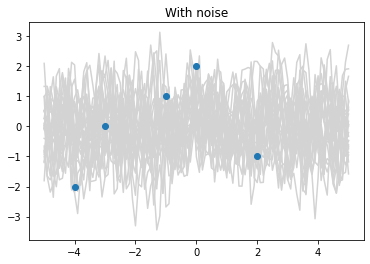

In [26]:
plt.plot(xs, fs, 'lightgray')
plt.scatter(x1, x2, zorder=3, cmap ='darkblue')
plt.title("With noise")
plt.show()

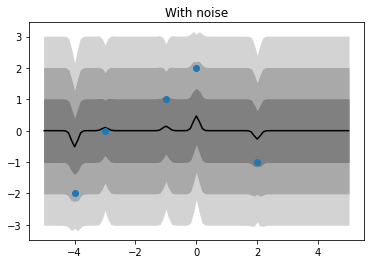

In [27]:
# Instead of plotting samples, plot a credibility region. 
plt.plot(xs, posterior_mean, 'black')
plt.fill_between(xs, posterior_mean + 3*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 3*np.sqrt(np.diag(posterior_cov)), 
                 color = 'lightgray')

plt.fill_between(xs, posterior_mean + 2*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 2*np.sqrt(np.diag(posterior_cov)), 
                 color = 'darkgray')

plt.fill_between(xs, posterior_mean + 1*np.sqrt(np.diag(posterior_cov)), 
                 posterior_mean- 1*np.sqrt(np.diag(posterior_cov)), 
                 color = 'gray')
plt.scatter(x1, x2, zorder=3)
plt.title("With noise")
plt.show()

Unlike the squared exponential kernel, the exponential kernel is only continuous -- it is not differentiable. This has implication in modeling since the functions produced inherit the smoothness of the kernel. As such, the a smooth kernel (like the squared exponential) is good for fitting smooth functions, while a non-differentiable kernel (like the exponential kernel) are useful for fitting non-differentiable functions.

Reference to the mathematical expression of kernel can be found [here](https://www.cs.cornell.edu/~bindel/class/sjtu-summer18/lec/2018-06-27.pdf).

[Additional reference](http://crsouza.com/2010/03/17/kernel-functions-for-machine-learning-applications/)

#### Conclusion
Overall, the gausssian process regression modelling is a valuable method for modelling stochastic processes and transforming data into a non-linear feature space to linearly separate the high-dimensionality in these kinds of data. It has been extensively used in popular machine learning models like the Support Vector Model and is proven to be an effective method for modelling environmental variables like temperature etc.